In [1]:
# uploading data into colab notebook
from google.colab import files
u = files.upload()

Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv


In [2]:
# Loading data using pandas
import pandas as pd
df = pd.read_csv('GlobalWeatherRepository.csv')

In [3]:
# Displaying sescriptive statistics of data
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57296 entries, 0 to 57295
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       57296 non-null  object 
 1   location_name                 57296 non-null  object 
 2   latitude                      57296 non-null  float64
 3   longitude                     57296 non-null  float64
 4   timezone                      57296 non-null  object 
 5   last_updated_epoch            57296 non-null  int64  
 6   last_updated                  57296 non-null  object 
 7   temperature_celsius           57296 non-null  float64
 8   temperature_fahrenheit        57296 non-null  float64
 9   condition_text                57296 non-null  object 
 10  wind_mph                      57296 non-null  float64
 11  wind_kph                      57296 non-null  float64
 12  wind_degree                   57296 non-null  int64  
 13  w

In [5]:
# Checking for null values
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [6]:
# Handing outliers using Inter Quartile Range(IQR)
Q1 = df.select_dtypes(include=['number']).quantile(0.25) # Select only numerical columns
Q3 = df.select_dtypes(include=['number']).quantile(0.75) # Select only numerical columns
IQR = Q3 - Q1
filtered_df = df[~((df[Q1.index] < (Q1 - 1.5 * IQR)) | (df[Q3.index] > (Q3 + 1.5 * IQR))).any(axis=1)] # Only filter on numerical columns
df = filtered_df

In [7]:
# Normalizing the numerical data using StandardScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.float64, np.int64]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [8]:
# Convert last_updated to datetime and setting index
df['last_updated'] = pd.to_datetime(df['last_updated'])
df.set_index('last_updated', inplace=True)

In [9]:
df['time'] = np.arange(len(df))

In [10]:
# Splitting the dataset into training(80%) and testing(20%)
train_data_size = int(len(df) * 0.8)
train, test = df.iloc[:train_data_size], df.iloc[train_data_size:]

In [11]:
# Setting the X, y Variables
X_train = train[['time']]
y_train = train['temperature_celsius']
X_test = test[['time']]
y_test = test['temperature_celsius']

In [12]:
# Training basic model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators=100, random_state=42)
RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Generating forecast predictions
RFR_forecast = RFR_model.predict(X_test)

In [14]:
# Evaluating the model perfomance using metrics like MSE and RMSE
from sklearn.metrics import mean_squared_error, root_mean_squared_error
MSE = mean_squared_error(y_test, RFR_forecast)
RMSE = np.sqrt(mean_squared_error(y_test, RFR_forecast))
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MSE)

Root Mean Squared Error: 1.5686325907589083
Mean Absolute Error: 2.4606082047910047


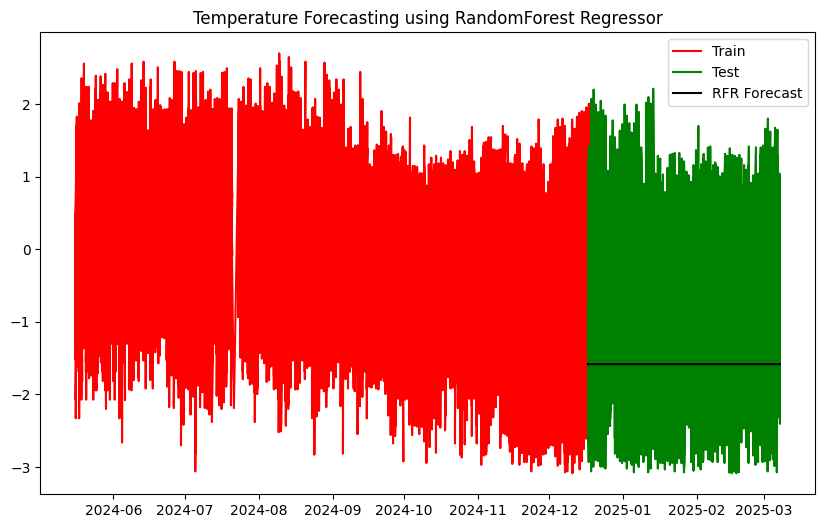

In [15]:
# Visualizing the temperature forecast with temperature celsius
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['temperature_celsius'], label='Train', color = 'red')
plt.plot(test.index, test['temperature_celsius'], label='Test', color = 'green')
plt.plot(test.index, RFR_forecast, label='RFR Forecast', color='black')
plt.legend()
plt.title('Temperature Forecasting using RandomForest Regressor')
plt.show()

In [16]:
# Detecting anamolies using IsolationForest due to it's ease of use for anamoly detection
from sklearn.ensemble import IsolationForest
ISO_forest = IsolationForest(contamination=0.01)
df['anomaly'] = ISO_forest.fit_predict(df[['temperature_celsius']])

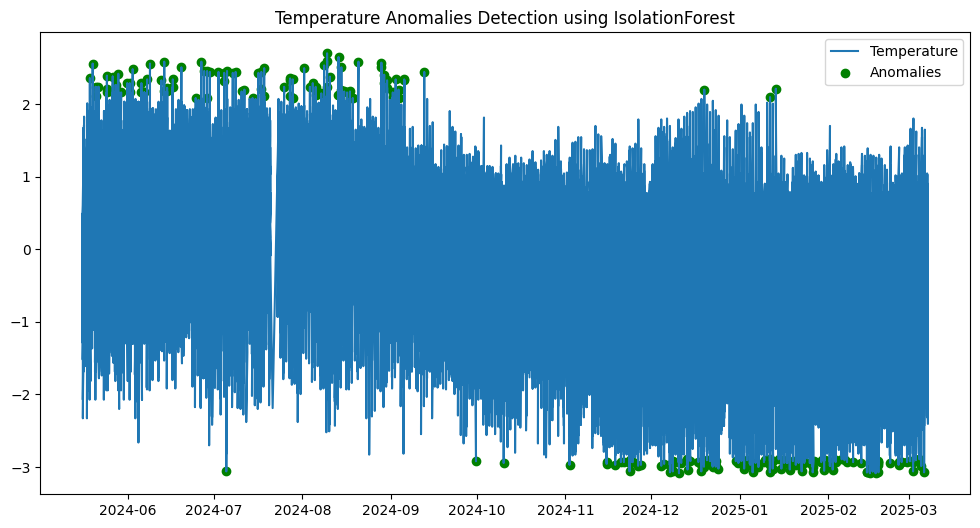

In [17]:
# Visualizing and detecting anamolies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature_celsius'], label='Temperature')
plt.scatter(df[df['anomaly'] == -1].index, df[df['anomaly'] == -1]['temperature_celsius'], color='green', label='Anomalies')
plt.legend()
plt.title('Temperature Anomalies Detection using IsolationForest')
plt.show()

In [18]:
# Training other models for better performance and predictions
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=100, random_state=42)
XGB_model.fit(X_train, y_train)
XGB_forecast = XGB_model.predict(X_test)
XGB_mse = mean_squared_error(y_test, XGB_forecast)
XGB_rmse = np.sqrt(mean_squared_error(y_test, XGB_forecast))
print('XGBoost MSE:', XGB_mse)
print('XGBoost RMSE:', XGB_rmse)

XGBoost MSE: 1.3419621623364677
XGBoost RMSE: 1.158430905292356


In [19]:
# Training basic ARIMA model for better predictions
from statsmodels.tsa.arima.model import ARIMA
ARIMA_model = ARIMA(train['temperature_celsius'], order=(5, 1, 0))
ARIMA_model_fit = ARIMA_model.fit()
ARIMA_forecast = ARIMA_model_fit.forecast(steps=len(test))
ARIMA_mse = mean_squared_error(y_test, ARIMA_forecast)
ARIMA_rmse = np.sqrt(mean_squared_error(y_test, ARIMA_forecast))
print('ARIMA MSE:', ARIMA_mse)
print('ARIMA RMSE:', ARIMA_rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

ARIMA MSE: 1.4070902358433817
ARIMA RMSE: 1.1862083441973343


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


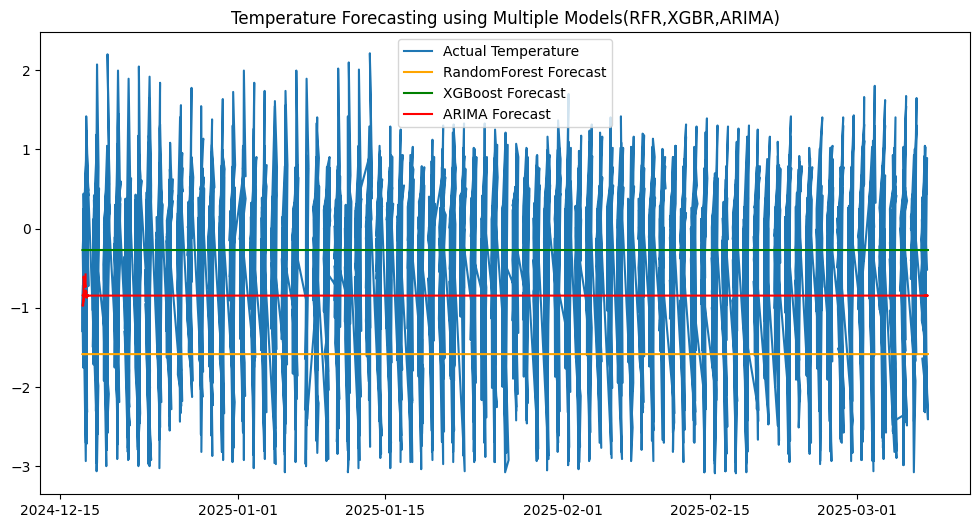

In [20]:
 # Visualizing forecasting using multiple models
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Temperature')
plt.plot(test.index, RFR_forecast, label='RandomForest Forecast', color='orange')
plt.plot(test.index, XGB_forecast, label='XGBoost Forecast', color='green')
plt.plot(test.index, ARIMA_forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('Temperature Forecasting using Multiple Models(RFR,XGBR,ARIMA)')
plt.show()

In [21]:
# Combining all models for getting better accuracy
ensemble_models_forecast = (XGB_forecast + ARIMA_forecast) / 2
ensemble_models_mse = mean_squared_error(y_test, ensemble_models_forecast)
ensemble_models_rmse = np.sqrt(mean_squared_error(y_test, ensemble_models_forecast))
print('Ensemble MSE:', ensemble_models_mse)
print('Ensemble RMSE:', ensemble_models_rmse)

Ensemble MSE: 1.2918780898025544
Ensemble RMSE: 1.1366081513883992


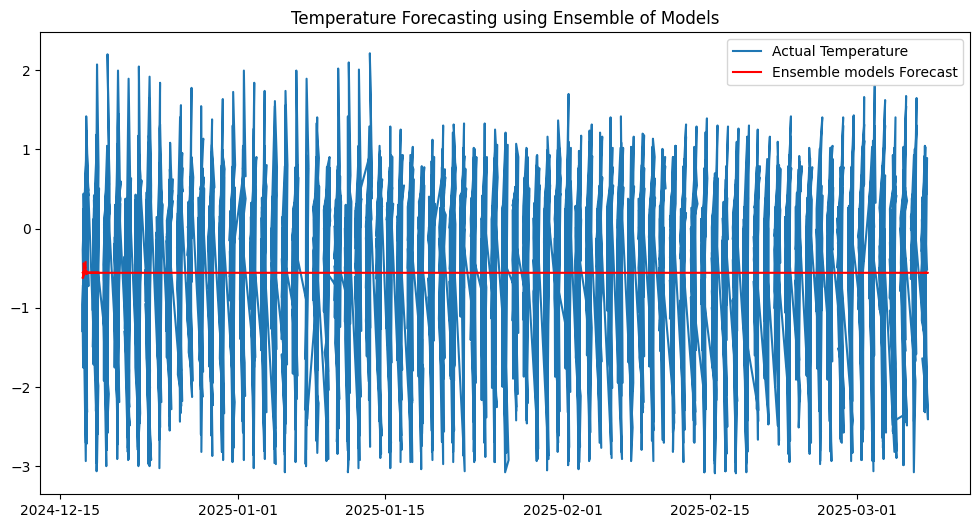

In [22]:
# Visualizing forecasy=ting using ensemble of models(RF forecast, XGB forecast, ARIMA forecast)
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Temperature')
plt.plot(test.index, ensemble_models_forecast, label='Ensemble models Forecast', color='red')
plt.legend()
plt.title('Temperature Forecasting using Ensemble of Models')
plt.show()

In [23]:
# Climate Analysis
df['year'] = df.index.year
climate_data = df.groupby(['country', 'year']).agg({
    'temperature_celsius': 'mean',
    'precip_mm': 'mean',
    'humidity': 'mean'
}).reset_index()

In [24]:
# Environmental Impact
air_quality_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']
weather_cols = ['temperature_celsius', 'humidity', 'precip_mm']
correlation_matrix_air_weather = df[air_quality_cols + weather_cols].corr()

In [26]:
# Feature Importance
X = df.drop(columns=['temperature_celsius', 'country', 'location_name', 'timezone', 'condition_text'])
y = df['temperature_celsius']
feature_importance = RFR_model.feature_importances_
features = X.columns

In [27]:
# Spatial Anaysis using folium(we can use geopandas for higher quality)....
import folium
from folium.plugins import HeatMap
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)
heatmap_data = [[row['latitude'], row['longitude'], row['temperature_celsius']] for index, row in df.iterrows()]
HeatMap(heatmap_data).add_to(m)
m.save('temperature_heatmap.html')

In [28]:
geo_data = df.groupby('country').agg({
    'temperature_celsius': 'mean',
    'precip_mm': 'mean',
    'humidity': 'mean'
}).reset_index()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


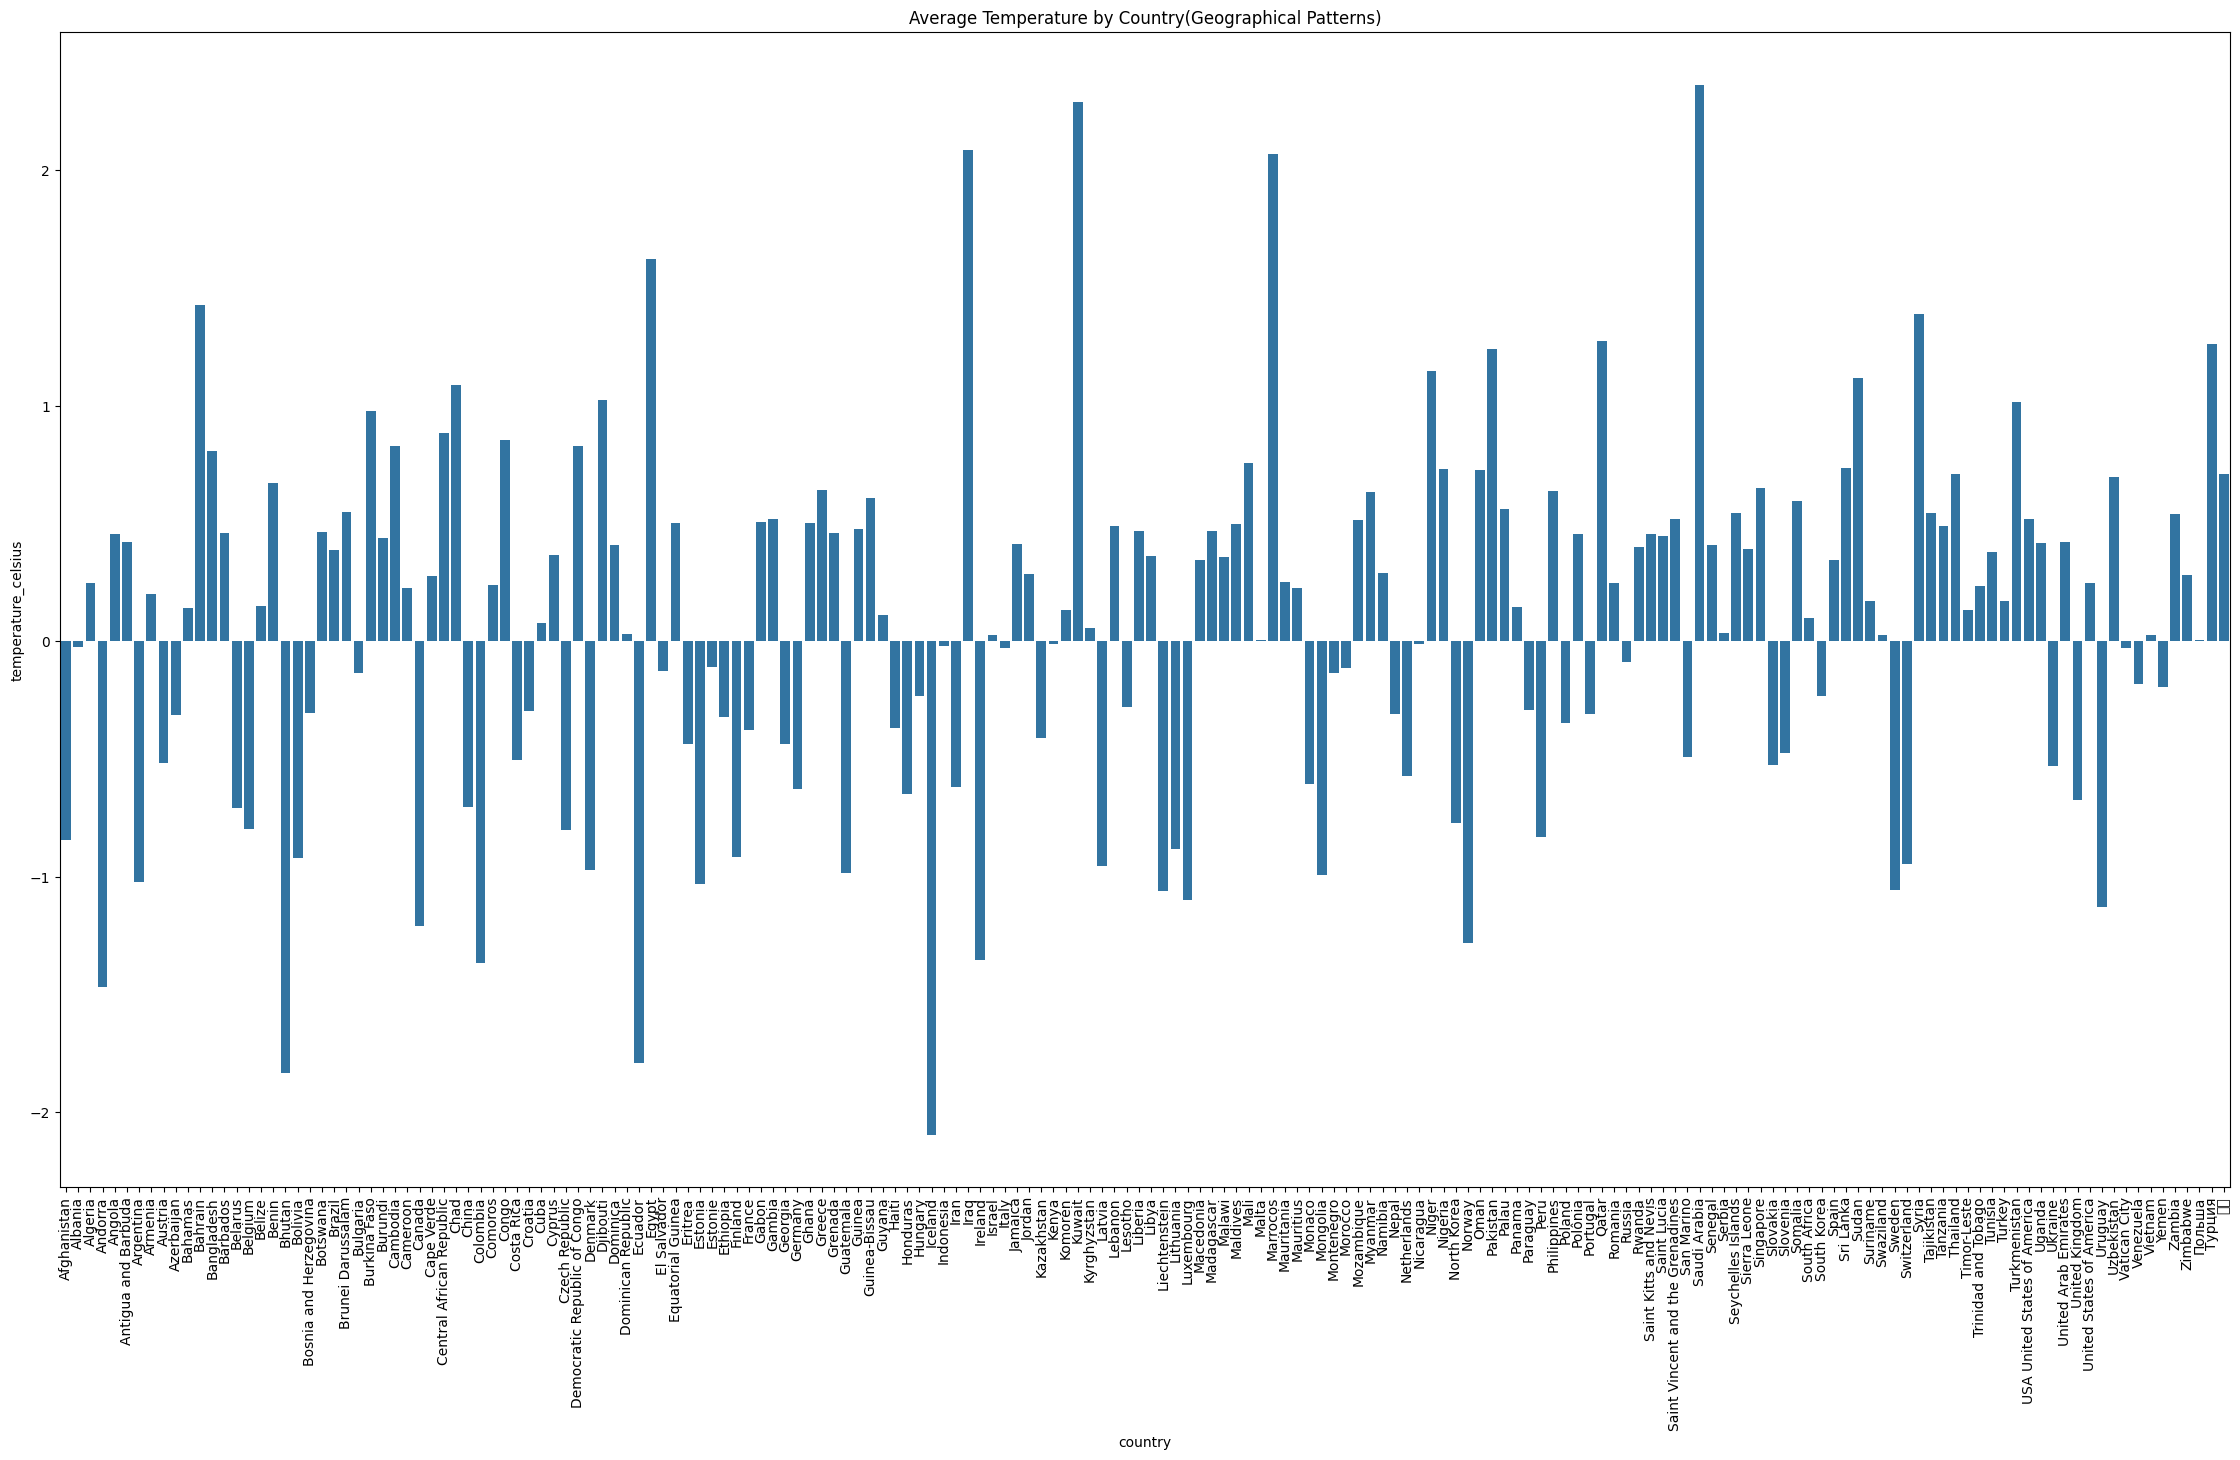

In [29]:
# Geographical Patterns over countries
import seaborn as sns
plt.figure(figsize=(28, 15))
sns.barplot(data=geo_data, x='country', y='temperature_celsius')
plt.title('Average Temperature by Country(Geographical Patterns)')
plt.xticks(rotation=90)
plt.show()